ref: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [1]:
import os
fpath = r"C:\Users\cyret\Documents\Python Scripts\data\human_data\dataset_uci\dataset_uci"
os.listdir(fpath)

['activity_labels.txt',
 'df_final_test.csv',
 'df_final_train.csv',
 'features.txt',
 'features_info.txt',
 'final_acc_test.txt',
 'final_acc_train.txt',
 'final_gyro_test.txt',
 'final_gyro_train.txt',
 'final_X_test.txt',
 'final_X_train.txt',
 'final_y_test.txt',
 'final_y_train.txt',
 'README.txt',
 'waist_mounted_phone.PNG']

std(): Standard deviation
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array
sma(): Signal magnitude area
energy(): Energy measure. Sum of the squares divided by the number of values. 
iqr(): Interquartile range 
entropy(): Signal entropy
arCoeff(): Autorregresion coefficients with Burg order equal to 4
correlation(): correlation coefficient between two signals
maxInds(): index of the frequency component with largest magnitude
meanFreq(): Weighted average of the frequency components to obtain a mean frequency
skewness(): skewness of the frequency domain signal 
kurtosis(): kurtosis of the frequency domain signal 
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
angle(): Angle between to vectors.

Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.core.display import display
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
np.set_printoptions(precision=2)

%matplotlib inline

In [3]:
feature_cols = pd.read_csv(os.path.join(fpath, 'features.txt'), sep=' ', index_col=0, header=None)
labels = pd.read_csv(os.path.join(fpath, 'activity_labels.txt'), sep=' ', index_col=0, header=None)
feature_cols = feature_cols[1].tolist()
labels.columns = ['label']
labels, feature_cols[-5:]

(                label
 0                    
 1             WALKING
 2    WALKING_UPSTAIRS
 3  WALKING_DOWNSTAIRS
 4             SITTING
 5            STANDING
 6              LAYING,
 ['angle(tBodyGyroMean,gravityMean)',
  'angle(tBodyGyroJerkMean,gravityMean)',
  'angle(X,gravityMean)',
  'angle(Y,gravityMean)',
  'angle(Z,gravityMean)'])

In [4]:
df_final_X_train = pd.read_csv(os.path.join(fpath, 'final_X_train.txt'), header=None)
df_final_X_train.columns = feature_cols
df_final_X_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
4247,0.28684,-0.016887,-0.11710,-0.98357,-0.99066,-0.97970,-0.98533,-0.99195,-0.98045,-0.92928,...,0.085943,-0.159950,-0.58147,0.045791,-0.099945,-0.043437,0.589010,0.40391,-0.79032,-0.15759
4248,0.28569,-0.017186,-0.10709,-0.98360,-0.98861,-0.99440,-0.98450,-0.98991,-0.99505,-0.92928,...,0.047450,0.001457,-0.38928,-0.137840,-0.110750,0.231190,-0.928130,0.40142,-0.79099,-0.15530
4249,0.28051,-0.017076,-0.10889,-0.98891,-0.99380,-0.99486,-0.98827,-0.99400,-0.99360,-0.93139,...,0.503120,-0.340150,-0.70291,-0.095181,0.302130,-0.215320,-0.292050,0.39991,-0.79018,-0.15549
4250,0.27921,-0.016717,-0.10827,-0.99196,-0.99474,-0.99603,-0.99225,-0.99395,-0.99560,-0.93139,...,0.503630,-0.654810,-0.89529,-0.481000,0.511110,-0.276490,0.020714,0.39891,-0.79000,-0.15515
4251,0.28274,-0.017231,-0.11013,-0.99541,-0.99349,-0.99707,-0.99573,-0.99310,-0.99755,-0.94040,...,0.591680,-0.638630,-0.90262,-0.000858,-0.347720,-0.786230,0.343220,0.39846,-0.78996,-0.15494


In [5]:
df_final_gyro_train = pd.read_csv(os.path.join(fpath, 'final_gyro_train.txt'), header=None)
df_final_gyro_train.columns = list('XYZ')
df_final_gyro_train.tail()

,X,Y,Z
286503,-0.052534,0.042455,0.021380
286504,-0.049786,0.046731,0.015272
286505,-0.036957,0.051618,0.016493
286506,-0.030849,0.048869,0.022602
286507,-0.022602,0.041539,0.015577


In [6]:
df_final_acc_train = pd.read_csv(os.path.join(fpath, 'final_acc_train.txt'), header=None)
df_final_acc_train.columns = list('XYZ')
df_final_acc_train.tail()

,X,Y,Z
284350,-1.7298,9.6023,2.3427
284351,-1.7706,9.7113,2.4380
284352,-1.7706,9.6432,2.3291
284353,-1.7979,9.6568,2.3972
284354,-1.7979,9.6432,2.3563


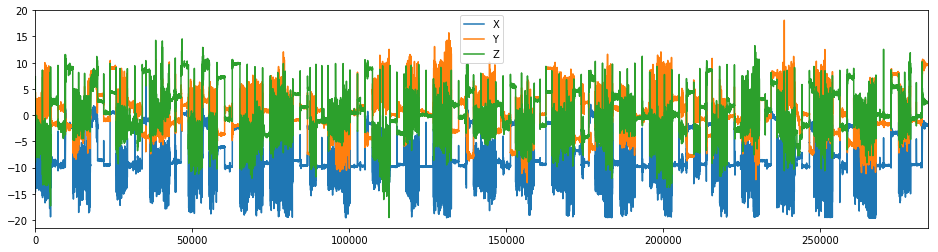

In [7]:
df_final_acc_train.plot(figsize=(16, 4))

In [8]:
df_final_y_train = pd.read_csv(os.path.join(fpath, 'final_y_train.txt'), header=None)
df_final_y_train.columns = ['label']
df_final_y_train.tail()

,label
4247,6
4248,6
4249,6
4250,6
4251,6


In [9]:
df_final_acc_train.shape[0] / df_final_y_train.shape[0]
df = pd.concat([df_final_X_train, df_final_y_train], axis=1)
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
4247,0.28684,-0.016887,-0.11710,-0.98357,-0.99066,-0.97970,-0.98533,-0.99195,-0.98045,-0.92928,...,-0.159950,-0.58147,0.045791,-0.099945,-0.043437,0.589010,0.40391,-0.79032,-0.15759,6
4248,0.28569,-0.017186,-0.10709,-0.98360,-0.98861,-0.99440,-0.98450,-0.98991,-0.99505,-0.92928,...,0.001457,-0.38928,-0.137840,-0.110750,0.231190,-0.928130,0.40142,-0.79099,-0.15530,6
4249,0.28051,-0.017076,-0.10889,-0.98891,-0.99380,-0.99486,-0.98827,-0.99400,-0.99360,-0.93139,...,-0.340150,-0.70291,-0.095181,0.302130,-0.215320,-0.292050,0.39991,-0.79018,-0.15549,6
4250,0.27921,-0.016717,-0.10827,-0.99196,-0.99474,-0.99603,-0.99225,-0.99395,-0.99560,-0.93139,...,-0.654810,-0.89529,-0.481000,0.511110,-0.276490,0.020714,0.39891,-0.79000,-0.15515,6
4251,0.28274,-0.017231,-0.11013,-0.99541,-0.99349,-0.99707,-0.99573,-0.99310,-0.99755,-0.94040,...,-0.638630,-0.90262,-0.000858,-0.347720,-0.786230,0.343220,0.39846,-0.78996,-0.15494,6


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    stratify=y, 
                                                    random_state=0)
print(X_train.shape, X_test.shape)

(2848, 561) (1404, 561)


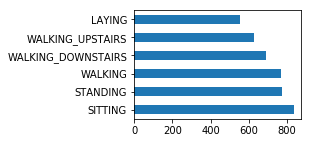

In [11]:
y.map(labels['label'].to_dict()).value_counts().plot.barh(figsize=(3,2))

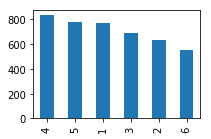

In [12]:
y.value_counts().plot.bar(figsize=(3,2))

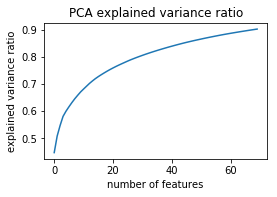

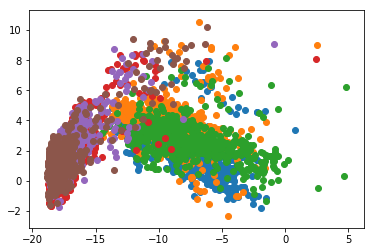

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA(n_components=70, random_state=42)
pca.fit(scaler.fit_transform(df_final_X_train))
df_pca = pca.transform(df_final_X_train)
plt.figure(figsize=(4, 2.5))
plt.plot(range(70), pca.explained_variance_ratio_.cumsum())
plt.title('PCA explained variance ratio')
plt.xlabel('number of features')
plt.ylabel('explained variance ratio')

plt.figure()
for i in df_final_y_train.label.unique():
    plt.scatter(df_pca[df_final_y_train.label == i, 0], 
                df_pca[df_final_y_train.label == i, 1], 
                )
plt.show()

C:\Users\cyret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cyret\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


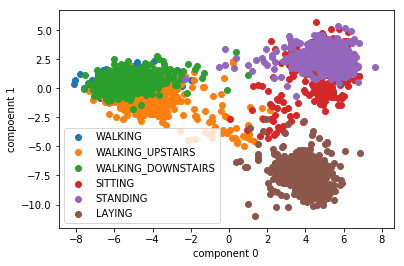

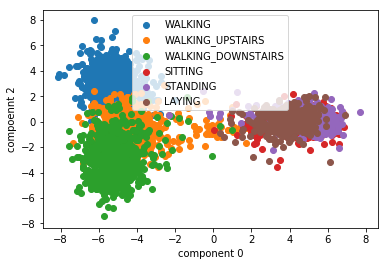

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=70)
lda.fit(scaler.fit_transform(df_final_X_train), df_final_y_train)
df_lda = lda.transform(scaler.fit_transform(df_final_X_train))
plt.figure()
for i in df_final_y_train.label.unique():
    plt.scatter(df_lda[df_final_y_train.label == i, 0], 
                df_lda[df_final_y_train.label == i, 1], 
                )
plt.legend(pd.Series(df_final_y_train.label.unique()).map(labels['label']))
plt.xlabel('component 0')
plt.ylabel('compoennt 1')
plt.show()

plt.figure()
for i in df_final_y_train.label.unique():
    plt.scatter(df_lda[df_final_y_train.label == i, 0], 
                df_lda[df_final_y_train.label == i, 2], 
                )
plt.legend(pd.Series(df_final_y_train.label.unique()).map(labels['label']), loc='best')
plt.xlabel('component 0')
plt.ylabel('compoennt 2')
plt.show()

Train a model based reduced features in PCA

In [15]:
scaler = StandardScaler()
pca = PCA(n_components=270, random_state=42)
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
clf_pca = RandomForestClassifier(n_estimators=3000, max_depth=9).fit(X_train_pca, y_train)

In [16]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(clf_pca.score(X_train_pca, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(clf_pca.score(pca.transform(scaler.transform(X_test)), y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.81


In [17]:
X_train_pca.shape

(2848, 270)

In [18]:
lda = LinearDiscriminantAnalysis(n_components=270)
lda.fit(scaler.fit_transform(X_train), y_train)
X_train_lda = lda.transform(scaler.fit_transform(X_train))
X_test_lda = lda.transform(scaler.fit_transform(X_test))
clf_lda = RandomForestClassifier(n_estimators=3000, max_depth=9).fit(X_train_lda, y_train)

C:\Users\cyret\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(clf_lda.score(X_train_lda, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(clf_lda.score(X_test_lda, y_test)))

Accuracy of Random Forest classifier on training set: 0.97
Accuracy of Random Forest classifier on test set: 0.79


In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
# Negative class (0) is most frequent, 
for strategy in ['most_frequent', 'stratified']:
    dummy_majority = DummyClassifier(strategy = strategy).fit(X_train, y_train)
    confusion = confusion_matrix(y_test, dummy_majority.predict(X_test))

    print('{} class (dummy classifier) score {}'.format(
            strategy, dummy_majority.score(X_test, y_test))
         )
    print('{} class (dummy classifier)\n {}'.format(strategy, confusion))

most_frequent class (dummy classifier) score 0.19586894586894588
most_frequent class (dummy classifier)
 [[  0   0   0 254   0   0]
 [  0   0   0 208   0   0]
 [  0   0   0 228   0   0]
 [  0   0   0 275   0   0]
 [  0   0   0 256   0   0]
 [  0   0   0 183   0   0]]
stratified class (dummy classifier) score 0.16666666666666666
stratified class (dummy classifier)
 [[45 30 49 54 44 32]
 [36 37 41 38 35 21]
 [38 31 39 42 40 38]
 [58 41 43 62 48 23]
 [43 38 35 47 51 42]
 [33 26 23 43 37 21]]


In [21]:
clf = RandomForestClassifier(n_estimators=3000, max_depth=9).fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.91


In [22]:
labels_name = [labels['label'].loc[_] for _ in clf.classes_]
labels, clf.classes_, labels.loc[4]

(                label
 0                    
 1             WALKING
 2    WALKING_UPSTAIRS
 3  WALKING_DOWNSTAIRS
 4             SITTING
 5            STANDING
 6              LAYING,
 array([1, 2, 3, 4, 5, 6], dtype=int64),
 label    SITTING
 Name: 4, dtype: object)

array([[243,   5,   6,   0,   0,   0],
       [ 13, 188,   4,   0,   0,   3],
       [ 13,  13, 200,   0,   2,   0],
       [  0,   4,   0, 232,  37,   2],
       [  2,   2,   0,  18, 234,   0],
       [  0,   4,   0,   0,   0, 179]], dtype=int64)

Text(0,0.5,'Accuracy score')

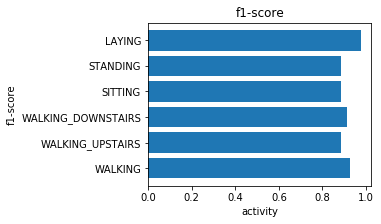

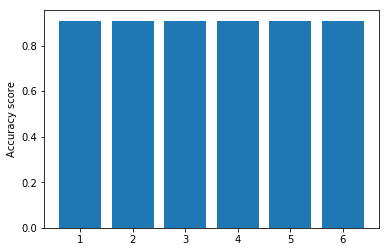

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)))
# display(pd.DataFrame(index=[labels['label'].loc[_] for _ in clf.classes_], 
#                      data=f1_score(y_test, clf.predict(X_test), average=None), 
#                      columns=['f1-score',]))
display(confusion_matrix(y_test, clf.predict(X_test)))
plt.figure(figsize=(4,3))
plt.barh(pd.Series(clf.classes_).map(labels.label.to_dict()), f1_score(y_test, clf.predict(X_test), average=None))
plt.ylabel('f1-score')
plt.xlabel('activity')
plt.title('f1-score')
plt.figure()
plt.bar(clf.classes_, clf.score(X_test, y_test))
plt.ylabel('Accuracy score')

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [24]:
report = classification_report(y_test, clf.predict(X_test), output_dict=True)
report = pd.DataFrame(report
                     ).transpose()
report.index.values[:6] = labels['label'].tolist()
print(round(report, 2))

                    f1-score  precision  recall  support
WALKING                 0.93       0.90    0.96    254.0
WALKING_UPSTAIRS        0.89       0.87    0.90    208.0
WALKING_DOWNSTAIRS      0.91       0.95    0.88    228.0
SITTING                 0.88       0.93    0.84    275.0
STANDING                0.88       0.86    0.91    256.0
LAYING                  0.98       0.97    0.98    183.0
macro avg               0.91       0.91    0.91   1404.0
micro avg               0.91       0.91    0.91   1404.0
weighted avg            0.91       0.91    0.91   1404.0


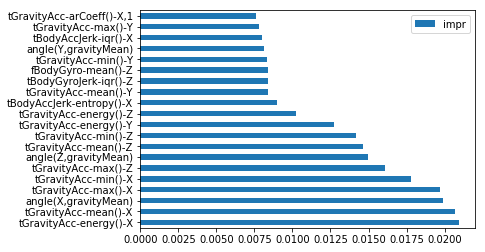

In [25]:
pd.DataFrame(clf.feature_importances_, X_test.columns, columns=[ 'impr']).nlargest(20, columns=['impr']).plot.barh()

In [26]:
# clf.feature_importances_

In [27]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(80,))
clf.fit(X_train, y_train)

print('Accuracy of ANN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of ANN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of ANN classifier on training set: 1.00
Accuracy of ANN classifier on test set: 0.91


C:\Users\cyret\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(500, 200, 20),)
clf.fit(X_train, y_train)

print('Accuracy of ANN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of ANN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of ANN classifier on training set: 1.00
Accuracy of ANN classifier on test set: 0.93


In [29]:
# clf.loss_curve_
# pd.concat([df_final_X_train, df_final_y_train], axis=1).to_csv(os.path.join(fpath, 'df_final_train.csv'), index=False)

In [30]:
df_final_X_test = pd.read_csv(os.path.join(fpath, 'final_X_test.txt'), header=None)
df_final_y_test = pd.read_csv(os.path.join(fpath, 'final_y_test.txt'), header=None)
df_final_X_test.columns = feature_cols
df_final_y_test.columns = ['label']
df_final_test = pd.concat([df_final_X_test, df_final_y_test], axis=1)
# df_final_test.to_csv(os.path.join(fpath, 'df_final_test.csv'), index=False)

In [25]:
os.listdir(fpath), os.getcwd(), fpath

(['activity_labels.txt',
  'df_final_test.csv',
  'df_final_train.csv',
  'features.txt',
  'features_info.txt',
  'final_acc_test.txt',
  'final_acc_train.txt',
  'final_gyro_test.txt',
  'final_gyro_train.txt',
  'final_X_test.txt',
  'final_X_train.txt',
  'final_y_test.txt',
  'final_y_train.txt',
  'README.txt',
  'waist_mounted_phone.PNG'],
 'C:\\Users\\cyret\\Dropbox\\druid\\Druid Analysis',
 'C:\\Users\\cyret\\Documents\\Python Scripts\\data\\human_data\\dataset_uci\\dataset_uci')

## keras tensorflow

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

This is called one hot encoding or creating dummy variables from a categorical variable.

In [60]:
input_dim = X_train.shape[1]
num_classes = len(y_train.unique())
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train_oh.shape, num_classes, y_train.unique())
# drop category 0, because np_utils.to_cat always start from 0 (label_encoder(y)), here orignal y starts from 1
y_train_oh = y_train_oh[:, 1:]
y_test_oh = y_test_oh[:, 1:]
y_train_oh.sum(axis=0, keepdims=True)

(2848, 561) (1404, 561) (2848, 7) 6 [4 2 3 1 5 6]


array([[515., 421., 463., 559., 519., 371.]], dtype=float32)

In [70]:
model = Sequential()
model.add(Dense(64*8, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64*8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax')) 

In [71]:
model.compile(loss='categorical_crossentropy', #'binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [72]:
history = model.fit(X_train, y_train_oh,
          epochs=80,
          batch_size=128)
# score = model.evaluate(X_test, y_test_oh, batch_size=128)

Epoch 1/80
2848/2848 [==============================] - 1s 305us/step - loss: 1.6187 - acc: 0.3055
Epoch 2/80
2848/2848 [==============================] - 0s 172us/step - loss: 1.2730 - acc: 0.3947
Epoch 3/80
2848/2848 [==============================] - 0s 168us/step - loss: 1.1160 - acc: 0.4782
Epoch 4/80
2848/2848 [==============================] - 0s 174us/step - loss: 1.0133 - acc: 0.5302
Epoch 5/80
2848/2848 [==============================] - 1s 179us/step - loss: 0.9129 - acc: 0.5825
Epoch 6/80
2848/2848 [==============================] - 1s 198us/step - loss: 0.8614 - acc: 0.6162
Epoch 7/80
2848/2848 [==============================] - 1s 188us/step - loss: 0.8156 - acc: 0.6419
Epoch 8/80
2848/2848 [==============================] - 1s 190us/step - loss: 0.7314 - acc: 0.6959
Epoch 9/80
2848/2848 [==============================] - 1s 226us/step - loss: 0.6994 - acc: 0.7195
Epoch 10/80
2848/2848 [==============================] - 1s 213us/step - loss: 0.6947 - acc: 0.7149
Epoch 11/

In [68]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               287744    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 390       
Total para

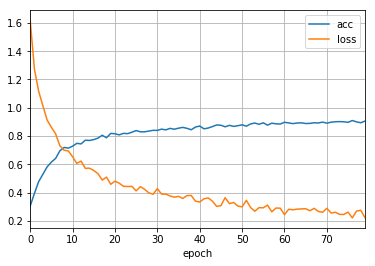

In [78]:
pd.DataFrame(history.history).plot()
plt.xlabel('epoch')
plt.grid()

### accuracy score using keras tensorflow

In [67]:
#Returns the loss value & metrics values for the model in test mode
model.evaluate(X_train, y_train_oh, batch_size=128), model.evaluate(X_test, y_test_oh, batch_size=128)

1404/1404 [==============================] - 0s 46us/step


([0.1707181821713287, 0.9188904494382022],
 [0.3902825416832568, 0.8682336199317563])

## use pyspark for classification

In [12]:
import pyspark
import os
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data_processing').getOrCreate()

In [2]:
# df_sp_final_X_train =spark.read.csv(os.path.join(fpath, 'final_X_train.txt'),inferSchema=True, header=False, ignoreLeadingWhiteSpace=True)
# df_sp_final_y_train =spark.read.csv(os.path.join(fpath, 'final_y_train.txt'),inferSchema=True, header=False, ignoreLeadingWhiteSpace=True)
# for old, new in zip(df_sp_final_X_train.columns, feature_cols):
# #     print(old, new)
#     df_sp_final_X_train = df_sp_final_X_train.withColumnRenamed(old, new)
# df_sp_final_y_train = df_sp_final_y_train.withColumnRenamed(df_sp_final_y_train.columns[0], 'label')
# df_sp_final_X_train.columns, df_sp_final_y_train.columns

In [16]:
df_sp_final_train = spark.read.csv(os.path.join(fpath, 'df_final_train.csv'),inferSchema=True, header=True, ignoreLeadingWhiteSpace=True)
df_sp_final_train.count()

4252

In [17]:
df_sp_final_test = spark.read.csv(os.path.join(fpath, 'df_final_test.csv'),inferSchema=True, header=True, ignoreLeadingWhiteSpace=True)
df_sp_final_test.count()

1492

In [18]:
df_new = df_sp_final_train
df_new.columns[-5:]

['angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'label']

In [19]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assembler = VectorAssembler(inputCols=df_new.columns, outputCol='features')
# df_new.printSchema()
print(df_new.count(), len(df_new.columns))
df_feature = vec_assembler.transform(df_new)
# df_feature.show(5)

4252 562


In [20]:
df_feature_test = vec_assembler.transform(df_sp_final_test)

In [21]:
from pyspark.ml.classification import RandomForestClassifier
rf_sp_ml = RandomForestClassifier(featuresCol='features', 
                                 labelCol='label', numTrees=100).fit(df_feature)

In [22]:
predictions = rf_sp_ml.transform(df_feature_test)
# predictions.show(5)
rf_sp_ml.featureImportances.values.argmax()

466

In [23]:
predictions.select('label').show(5)

+-----+
|label|
+-----+
|    4|
|    4|
|    4|
|    4|
|    4|
+-----+
only showing top 5 rows



In [24]:
predictions.columns[-5:]

['label', 'features', 'rawPrediction', 'probability', 'prediction']

In [25]:
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator.evaluate(predictions)
print("f1_score on test data = %g" % f1_score)

f1_score on test data = 0.881744
